In [18]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,assemble,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-04 10:28:00,307: Credentials are already in use. The existing account in the session will be replaced.


In [19]:
%matplotlib inline

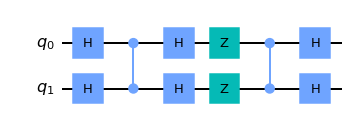

In [20]:
n = 2
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl'))

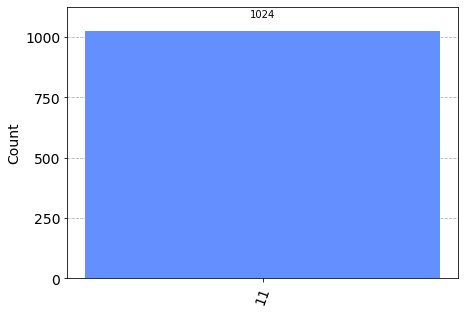

In [21]:
qc.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [22]:

provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.tools.monitor import job_monitor
qcomp = provider.get_backend('ibmq_belem')
job = execute(qc,backend = qcomp)
job_monitor(job)


Job Status: job has successfully run


In [ ]:
result = job.result()
plot_histogram(result.get_counts())